In [ ]:
# This Notebook loads a dataset from memory, calculates NDWI on the result set using a cloud mask, and plots the results.
# Monitor changes related to water content in water bodies, using green and NIR wavelengths, defined by McFeeters (1996):
# NDWI = (green - nir) / (green + nir)

In [3]:
# Setup cube connection
import datacube
from datacube.storage import masking
dc = datacube.Datacube()

In [12]:
# Build the query dictionary
query = { 
    'product' : 'LC08_scene'
    , 'time' : ('2017-07-05','2017-08-23')
    , 'latitude' : (47.7838, 49.93203)
    , 'longitude' : (-124.35999, -121.14917)
    , 'measurements' : ['green', 'nir', 'quality']
    , 'resolution' : (-0.0025, 0.0025)
}

In [13]:
#dc.find_datasets(**query)

In [14]:
data = dc.load(**query)

In [15]:
# Isolate all valid data in the the two bands of interest
green = data.green.where(data.green != data.green.attrs['nodata'])
nir = data.nir.where(data.nir != data.nir.attrs['nodata'])

In [17]:
green.plot(col='time', col_wrap = 1, size = 10)
nir.plot(col='time', col_wrap = 1, size = 10)

In [19]:
#Calculate the NDWI
NDWI = ((green - nir) / (green + nir))

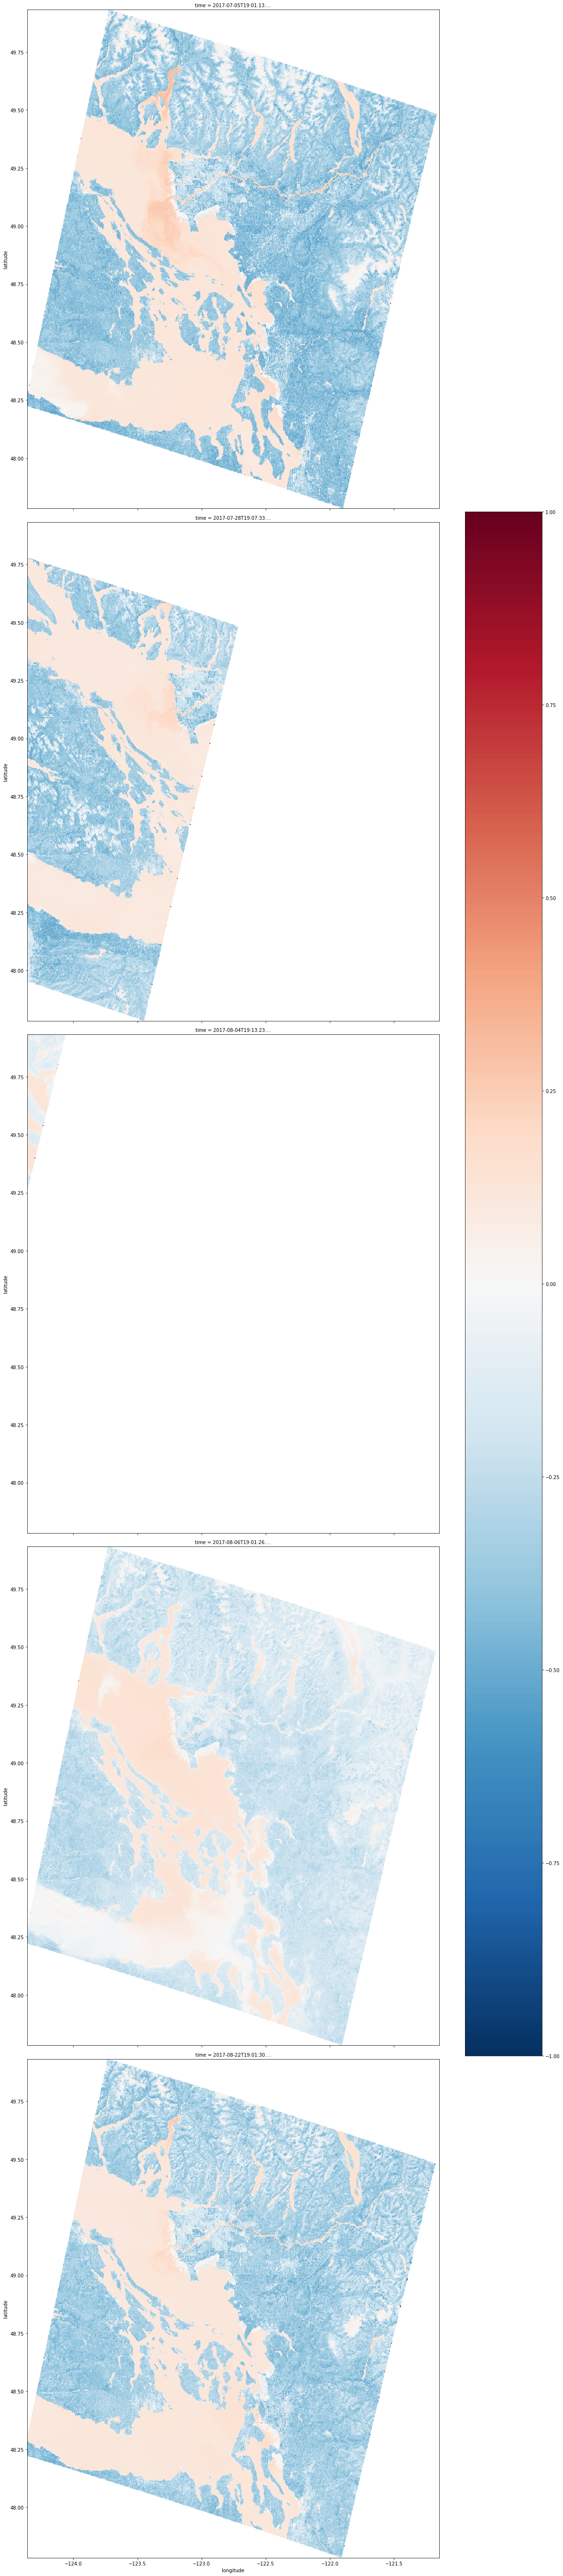

In [20]:
# Plot the results
NDWI.plot(col='time', col_wrap = 1, size = 15)

In [23]:
# Prepare the pixel quality band as a cloud mask
cloud_free = masking.make_mask(data, cloud=False, cirrus_confidence='Low', cloud_shadow_conf='Low').quality

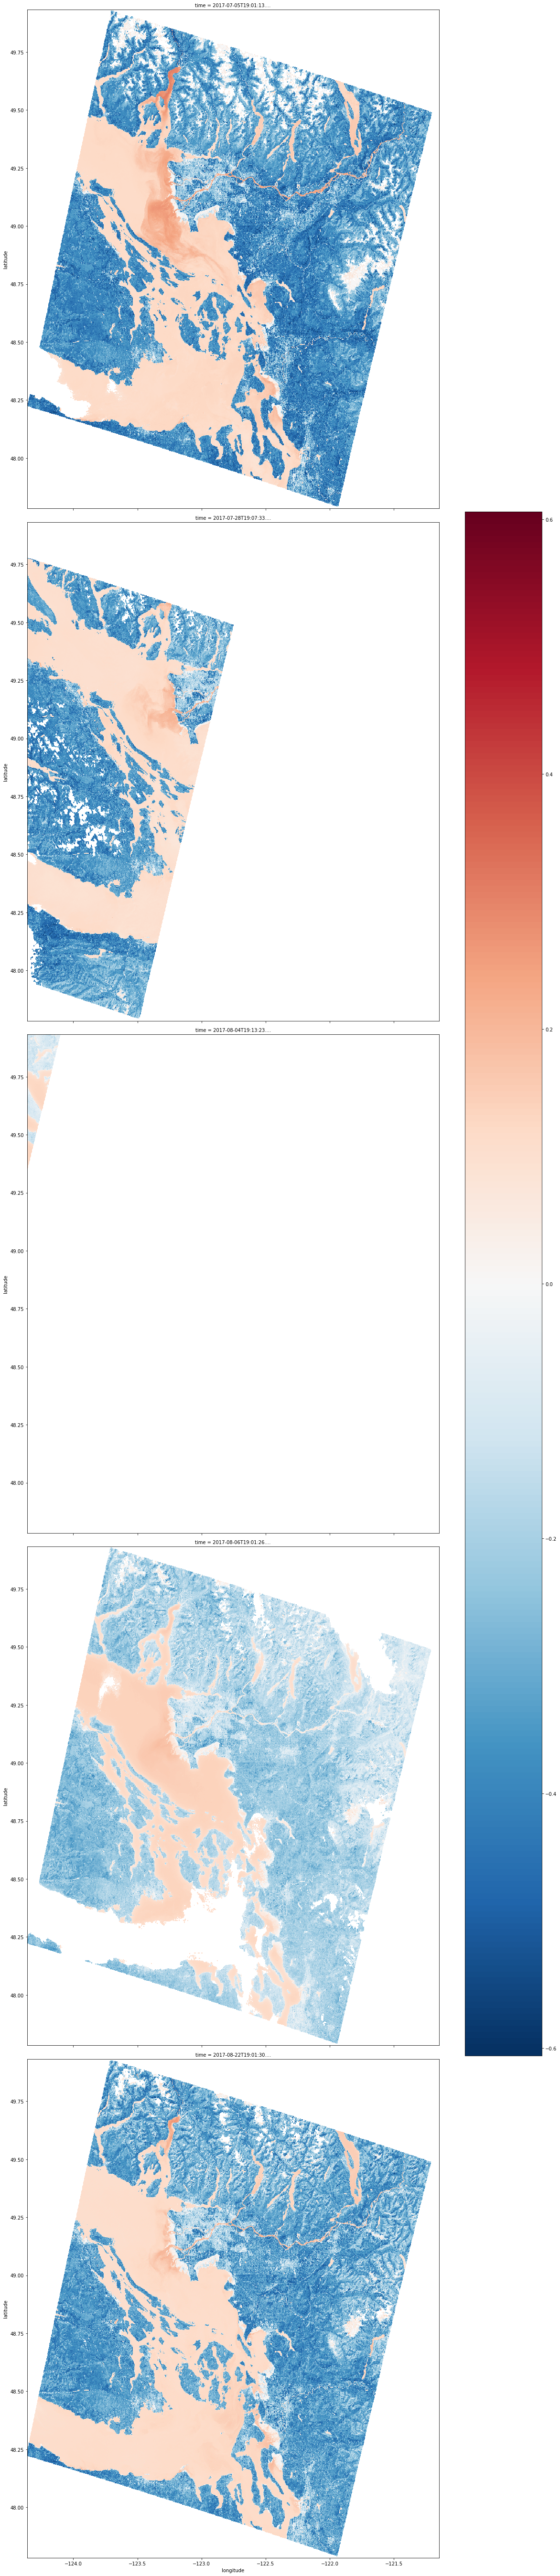

In [25]:
NDWI = ((green - nir) / (green + nir)).where(cloud_free)
NDWI.plot(col='time', col_wrap = 1, size = 15)